In [61]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('ggplot')
%matplotlib inline
import logging
import json

logging.basicConfig(level=logging.INFO)

## To do (10/6/2024)
 - Analyze p-values in articles detected by minP but not HC (relevant file: ``articles_good_minp_bad_HC``)
 - Analyze the significance of the topic using conditional logistic regression (relevant file: ``all_articles_results_maindataset.csv``)

In [74]:
from src.fit_survival_function import fit_survival_func

In [75]:
from tqdm import tqdm
from multitest import MultiTest
import pandas as pd
from src.DetectLM import DetectLM

from src.fit_survival_function import fit_per_length_survival_function, fit_survival_func
from src.HC_survival_function import get_HC_survival_function


### Results from Idan's

- results/results_news_abstract_dataset.csv
- results/results_mainDataset.csv
- results/results_SecondDataset.csv
- results/AUC_ROC_SecondDataset_response.xlsx
- results/SecondDatasetSentences_Phi2.csv
- results/SecondDatasetSentences_GPT2XL.csv
- results/AUC_ROC_HC_datasets.xlsx
- results/results_SecondDataset_embedding.csv

In [190]:
#df = pd.read_csv("~/Downloads/mainDataset_minP_value_folds.csv")
#df = pd.read_csv("~/Downloads/folds_resutls (1).csv")
import glob

HC_survival_func = get_HC_survival_function("HC_null_sim_results.csv")

fns = glob.glob("/Users/kipnisal/Downloads/articles_good_minp_bad_HC/*sentences_edited.csv")
for fn in fns:
    df = pd.read_csv(fn)
    print("Filename: ", fn)
    mt = MultiTest(df['pvalue'])
    print("# sentences: ", len(df))
    print("HC: ", mt.hc()[0])
    print("HC pvalue: ", HC_survival_func(len(df), mt.hc()[0]))
    print("minP: ", mt.minp())


Filename:  /Users/kipnisal/Downloads/articles_good_minp_bad_HC/article_6_sentences_edited.csv
# sentences:  82
HC:  1.6878356153614722
HC pvalue:  [[0.18069118]]
minP:  7.232725675247673
Filename:  /Users/kipnisal/Downloads/articles_good_minp_bad_HC/article_11_sentences_edited.csv
# sentences:  165
HC:  1.9856481645159547
HC pvalue:  [[0.10608651]]
minP:  7.096354873964983
Filename:  /Users/kipnisal/Downloads/articles_good_minp_bad_HC/article_7_sentences_edited.csv
# sentences:  120
HC:  3.084437138360758
HC pvalue:  [[0.02374019]]
minP:  7.142247673688272
Filename:  /Users/kipnisal/Downloads/articles_good_minp_bad_HC/article_13_sentences_edited.csv
# sentences:  237
HC:  2.5988528442808225
HC pvalue:  [[0.14622696]]
minP:  7.11529127495309


In [41]:
df1 = pd.read_csv("/Users/kipnisal/Downloads/articles_good_minp_bad_HC/article_11_edited_results.csv")
df1

,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,HC,HC_pvalue,berk_jones,edit_rate,fisher,fisher_pvalue,length,precision,recall,minus_log_min_p_value
0,0,0,0,article_11_sentences_edited,2.111849,0.033972,4.559885,0.127273,395.953921,0.007358,165.0,0.257576,0.809524,7.096355


In [20]:
glob.glob("/Users/kipnisal/Downloads/articles_good_minp_bad_HC/*")

['/Users/kipnisal/Downloads/articles_good_minp_bad_HC/article_6_edited_results.csv',
 '/Users/kipnisal/Downloads/articles_good_minp_bad_HC/article_6_sentences_edited.csv',
 '/Users/kipnisal/Downloads/articles_good_minp_bad_HC/article_11_sentences_edited.csv',
 '/Users/kipnisal/Downloads/articles_good_minp_bad_HC/article_13_edited_results.csv',
 '/Users/kipnisal/Downloads/articles_good_minp_bad_HC/article_7_sentences_edited.csv',
 '/Users/kipnisal/Downloads/articles_good_minp_bad_HC/article_11_edited_results.csv',
 '/Users/kipnisal/Downloads/articles_good_minp_bad_HC/article_7_edited_results.csv',
 '/Users/kipnisal/Downloads/articles_good_minp_bad_HC/article_13_sentences_edited.csv']

In [13]:
fns

[]

In [10]:
mt = MultiTest(df['pvalue'])
mt.hc()

(1.6878356153614722, 0.0083555389208014)

In [84]:
df.groupby(['topic', 'model', 'edit_ratio']).accuracy.agg(['mean', 'std', 'count'])

mean       std  \
topic                              model  edit_ratio                       
characters_articles                gpt2xl 0.05        0.618732  0.018059   
                                          0.10        0.688669  0.013578   
                                          0.15        0.734735  0.021242   
                                   phi2   0.05        0.623470  0.030043   
                                          0.10        0.694405  0.021565   
                                          0.15        0.737421  0.024217   
locations_articles                 gpt2xl 0.05        0.663161  0.003468   
                                          0.10        0.740834  0.007439   
                                          0.15        0.786013  0.010493   
                                   phi2   0.05        0.665392  0.008078   
                                          0.10        0.748128  0.012210   
                                          0.15        0.791034  0.016702   
nature_articles                    gpt2xl 0.05        0.624629  0.016393   
                                          0.10        0.694953  0.026524   
                                          0.15        0.755892  0.037274   
                                   phi2   0.05        0.627460  0.020241   
                                          0.10        0.696321  0.026337   
                                          0.15        0.755864  0.034970   
video_games_series_movies_articles gpt2xl 0.05        0.600003  0.016072   
                                          0.10        0.658594  0.007221   
                                          0.15        0.695472  0.009158   
                                   phi2   0.05        0.599781  0.011406   
                                          0.10        0.663535  0.010454   
                                          0.15        0.698895  0.009183   
war_articles                       gpt2xl 0.05        0.629611  0.032374   
                                          0.10        0.692638  0.012308   
                                          0.15        0.724428  0.005746   
                                   phi2   0.05        0.623773  0.014560   
                                          0.10        0.691830  0.011401   
                                          0.15        0.724572  0.010344   

                                                      count  
topic                              model  edit_ratio         
characters_articles                gpt2xl 0.05           10  
                                          0.10           10  
                                          0.15           10  
                                   phi2   0.05           10  
                                          0.10           10  
                                          0.15           10  
locations_articles                 gpt2xl 0.05           10  
                                          0.10           10  
                                          0.15           10  
                                   phi2   0.05           10  
                                          0.10           10  
                                          0.15           10  
nature_articles                    gpt2xl 0.05           10  
                                          0.10           10  
                                          0.15           10  
                                   phi2   0.05           10  
                                          0.10           10  
                                          0.15           10  
video_games_series_movies_articles gpt2xl 0.05           10  
                                          0.10           10  
                                          0.15           10  
                                   phi2   0.05           10  
                                          0.10           10  
                                          0.15           10  
war_articles 

In [86]:
df

,Unnamed: 0,topic,model,edit_ratio,fold,best_Threshold_HC,AUC_ROC,TPR,FPR,accuracy,...,best_Threshold_minp_005,AUC_ROC_005_minp,TPR_005_minp,FPR_005_minp,accuracy_005_minp,best_Threshold_minp_optimal_acc,AUC_ROC_optimal_acc_minp,TPR_optimal_acc_minp,FPR_optimal_acc_minp,accuracy_optimal_acc_minp
0,0,characters_articles,gpt2xl,0.05,0,1.107223,0.640625,0.750000,0.437500,0.656250,...,6.798015,0.771484,0.875000,0.437500,0.718750,6.133394,0.771484,1,1.0,0.5
1,0,characters_articles,phi2,0.05,0,1.107223,0.675781,0.812500,0.406250,0.703125,...,6.819441,0.739258,1.000000,0.968750,0.515625,6.063328,0.739258,1,1.0,0.5
2,0,characters_articles,gpt2xl,0.05,1,1.107223,0.634115,0.687500,0.395833,0.645833,...,6.813349,0.713542,0.875000,0.687500,0.593750,5.672064,0.713542,1,1.0,0.5
3,0,characters_articles,phi2,0.05,1,1.074808,0.624023,0.703125,0.437500,0.632812,...,6.813349,0.702271,0.890625,0.718750,0.585938,5.768325,0.702271,1,1.0,0.5
4,0,characters_articles,gpt2xl,0.05,2,0.798252,0.615469,0.775000,0.537500,0.618750,...,6.894285,0.686406,0.887500,0.750000,0.568750,5.768325,0.686406,1,1.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0,war_articles,phi2,0.15,7,1.194696,0.761353,0.890625,0.437500,0.726562,...,7.293244,0.826035,0.964844,0.628906,0.667969,6.241506,0.826035,1,1.0,0.5
296,0,war_articles,gpt2xl,0.15,8,1.017575,0.759867,0.904412,0.455882,0.724265,...,7.250385,0.822678,0.963235,0.621324,0.670956,6.241506,0.822678,1,1.0,0.5
297,0,war_articles,phi2,0.15,8,1.017575,0.763129,0.895833,0.447917,0.723958,...,7.244255,0.826323,0.961806,0.614583,0.673611,6.241506,0.826323,1,1.0,0.5
298,0,war_articles,gpt2xl,0.15,9,1.017575,0.763129,0.895833,0.447917,0.723958,...,7.244255,0.826323,0.961806,0.614583,0.673611,6.241506,0.826323,1,1.0,0.5


In [101]:
# Run ANOVA for group differences in accurracy for each topic:
from scipy.stats import f_oneway

for edit_ratio in df.edit_ratio.unique():
    for model in df.model.unique():


        dfr = df[(df.edit_ratio == edit_ratio) & (df.model == model)]

        dfp = dfr.pivot_table(index='topic', columns='fold', values='accuracy')

        X = dfp.values
        print(f_oneway(*[x for x in X]))

        # regress accuracy on length


F_onewayResult(statistic=13.83096561335974, pvalue=1.9635405445429347e-07)
F_onewayResult(statistic=16.232559230973592, pvalue=2.674027348366874e-08)
F_onewayResult(statistic=37.8403514080028, pvalue=7.362161151201704e-14)
F_onewayResult(statistic=30.307496082576804, pvalue=2.965484935893189e-12)
F_onewayResult(statistic=27.93347644311043, pvalue=1.0903973881442948e-11)
F_onewayResult(statistic=26.20062202018848, pvalue=2.9640631844891444e-11)


In [103]:
df.columns

Index(['Unnamed: 0', 'topic', 'model', 'edit_ratio', 'fold',
       'best_Threshold_HC', 'AUC_ROC', 'TPR', 'FPR', 'accuracy',
       'best_Threshold_HC_005', 'AUC_ROC_005', 'TPR_005', 'FPR_005',
       'accuracy_005', 'best_Threshold_HC_optimal_acc', 'AUC_ROC_optimal_acc',
       'TPR_optimal_acc', 'FPR_optimal_acc', 'accuracy_optimal_acc',
       'best_Threshold_minp', 'AUC_ROC_minp', 'TPR_minp', 'FPR_minp',
       'accuracy_minp', 'best_Threshold_minp_005', 'AUC_ROC_005_minp',
       'TPR_005_minp', 'FPR_005_minp', 'accuracy_005_minp',
       'best_Threshold_minp_optimal_acc', 'AUC_ROC_optimal_acc_minp',
       'TPR_optimal_acc_minp', 'FPR_optimal_acc_minp',
       'accuracy_optimal_acc_minp'],
      dtype='object')

In [96]:
X.shape

(5, 10)

array([[0.71875   , 0.69791667, 0.68125   , 0.70089286, 0.6875    ,
        0.67897727, 0.6875    , 0.68125   , 0.67830882, 0.67434211],
       [0.73333333, 0.75555556, 0.74666667, 0.74285714, 0.74074074,
        0.74545454, 0.74102564, 0.73777778, 0.73529412, 0.72962963],
       [0.75      , 0.71875   , 0.71875   , 0.70089286, 0.6875    ,
        0.67613636, 0.67788461, 0.67083333, 0.67279412, 0.67598684],
       [0.64285714, 0.6547619 , 0.65714286, 0.65816326, 0.66666667,
        0.66883117, 0.65934066, 0.6547619 , 0.66176471, 0.66165414],
       [0.71875   , 0.70833333, 0.7       , 0.68303571, 0.68402778,
        0.68465909, 0.6875    , 0.68333333, 0.6875    , 0.68923611]])

In [35]:
df[ np.abs(df['minus_log_min_p_value'] - 1.540549) < 0.0001 ]

,topic,model,fold,edited,edit_ratio,length,minus_log_min_p_value
5694,video_games_series_movies_articles,gpt2xl,3,0,0.05,112.0,1.540549
6250,video_games_series_movies_articles,gpt2xl,3,0,0.10,112.0,1.540549
6806,video_games_series_movies_articles,gpt2xl,3,0,0.15,112.0,1.540549


In [74]:
def get_threshold(xx0, xx1, G = 1021):
    tt = np.linspace(np.min(xx1), np.max(xx0), G)
    if len(tt) == 0:
        return (np.min(xx1) + np.max(xx0)) / 2
    # find the threshold that maximizes the accuracy:
    acc = np.zeros(G)
    for i, t in enumerate(tt):
        acc[i] = np.sum(xx0 < t) + np.sum(xx1 > t)
    return tt[np.argmax(acc)]

from tqdm import tqdm
res = []
for topic in tqdm(df['topic'].unique()):
    for edit_ratio in [0.05, 0.1, 0.15]:
        dfr = df[(df['edit_ratio'] == edit_ratio) & (df['topic'] == topic)]
        for stat in ['HC', 'minus_log_min_p_value']:
            for fold in range(10):
                df_test = dfr[dfr['fold'] == fold]
                df_train = dfr[dfr['fold'] != fold]
                
                xx0 = df_train[stat][df_train['edited'] == 0]
                xx1 = df_train[stat][df_train['edited'] == 1]
                threshold = get_threshold(xx0, xx1, G=2376)

                acc = (np.sum(df_test[df_test['edited']==0][stat] < threshold) + np.sum(df_test[df_test['edited']==1][stat] >= threshold)) / len(df_test)
                res.append(dict(edit_ratio=edit_ratio, stat=stat, fold=fold, acc=acc, topic=topic, threshold=threshold))
                #print(f"Threshold = {threshold}, acc = {acc}")


100%|██████████| 5/5 [01:00<00:00, 12.03s/it]


In [78]:
df_res = pd.DataFrame(res)
df_res[df_res['edit_ratio'] == 0.15].groupby(['edit_ratio', 'stat', 'topic']).agg(['mean', 'std', 'count'])

fold  \
                                                                    mean   
edit_ratio stat                  topic                                     
0.15       HC                    characters_articles                 4.5   
                                 locations_articles                  4.5   
                                 nature_articles                     4.5   
                                 video_games_series_movies_articles  4.5   
                                 war_articles                        4.5   
           minus_log_min_p_value characters_articles                 4.5   
                                 locations_articles                  4.5   
                                 nature_articles                     4.5   
                                 video_games_series_movies_articles  4.5   
                                 war_articles                        4.5   

                                                                              \
                                                                         std   
edit_ratio stat                  topic                                         
0.15       HC                    characters_articles                 3.02765   
                                 locations_articles                  3.02765   
                                 nature_articles                     3.02765   
                                 video_games_series_movies_articles  3.02765   
                                 war_articles                        3.02765   
           minus_log_min_p_value characters_articles                 3.02765   
                                 locations_articles                  3.02765   
                                 nature_articles                     3.02765   
                                 video_games_series_movies_articles  3.02765   
                                 war_articles                        3.02765   

                                                                           \
                                                                    count   
edit_ratio stat                  topic                                      
0.15       HC                    characters_articles                   10   
                                 locations_articles                    10   
                                 nature_articles                       10   
                                 video_games_series_movies_articles    10   
                                 war_articles                          10   
           minus_log_min_p_value characters_articles                   10   
                                 locations_articles                    10   
                                 nature_articles                       10   
                                 video_games_series_movies_articles    10   
                                 war_articles                          10   

                                                                          acc  \
                                                                         mean   
edit_ratio stat                  topic                                          
0.15       HC                    characters_articles                 0.725122   
                                 locations_articles                  0.740000   
                                 nature_articles                     0.712500   
                                 video_games_series_movies_articles  0.692033   
                                 war_articles                        0.723824   
           minus_log_min_p_value characters_articles                 0.745485   
                                 locations_articles                  0.771667   
                                 nature_articles                     0.754687   
                                 video_games_series_movies_articles  0.719780   
                                 war_articles                   

In [73]:
dft = pd.read_csv("~/Downloads/results_AllDatasets.csv")
dft[dft['model'] == 'phi2'][dft.topic.isin(df['topic'].unique())].groupby(['edit_ratio', 'statistics', 'topic'])['Accuracy_test'].agg(['mean', 'std', 'count'])

/var/folders/3n/c1thdb3136qc3c_4t5br9r6c0000gq/T/ipykernel_37340/4162329591.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dft[dft['model'] == 'phi2'][dft.topic.isin(df['topic'].unique())].groupby(['edit_ratio', 'statistics', 'topic'])['Accuracy_test'].agg(['mean', 'std', 'count'])


mean  std  \
edit_ratio statistics  topic                                               
0.1        HC          characters_articles                 0.699056  NaN   
                       locations_articles                  0.734060  NaN   
                       nature_articles                     0.712047  NaN   
                       video_games_series_movies_articles  0.640779  NaN   
                       war_articles                        0.653759  NaN   
           Min_P_value characters_articles                 0.684433  NaN   
                       locations_articles                  0.781407  NaN   
                       nature_articles                     0.747793  NaN   
                       video_games_series_movies_articles  0.654967  NaN   
                       war_articles                        0.679685  NaN   

                                                           count  
edit_ratio statistics  topic                                      
0.1        HC          characters_articles                     1  
                       locations_articles                      1  
                       nature_articles                         1  
                       video_games_series_movies_articles      1  
                       war_articles                            1  
           Min_P_value characters_articles                     1  
                       locations_articles                      1  
                       nature_articles                         1  
                       video_games_series_movies_articles      1  
                       war_articles                            1

In [13]:
df.groupby(["model", "edit_ratio"])['length'].agg(['mean', 'std', 'min', 'max'])

mean        std   min     max
model  edit_ratio                                     
gpt2xl 0.05        181.420779  91.428691  23.0  1006.0
       0.10        186.022078  94.093608  23.0  1054.0
       0.15        190.453896  96.897546  23.0  1102.0
phi2   0.05        181.420779  91.428691  23.0  1006.0
       0.10        186.022078  94.093608  23.0  1054.0
       0.15        190.453896  96.897546  23.0  1102.0

In [8]:
df.loc[:, 'minP'] = np.exp(-df['minus_log_min_p_value'])
df.loc[:, 'minP_length'] = df.loc[:, 'minP'] * df['length']
df

,topic,model,fold,edit_ratio,length,minus_log_min_p_value,minP,minP_length
0,characters_articles,gpt2xl,0,0.05,309.0,5.027739,0.006554,2.025066
1,characters_articles,gpt2xl,0,0.05,173.0,6.819441,0.001092,0.188973
2,characters_articles,gpt2xl,0,0.05,144.0,5.385011,0.004585,0.660210
3,characters_articles,gpt2xl,0,0.05,224.0,6.813349,0.001099,0.246177
4,characters_articles,gpt2xl,0,0.05,206.0,6.207717,0.002014,0.414849
...,...,...,...,...,...,...,...,...
9235,war_articles,phi2,9,0.15,314.0,7.107808,0.000819,0.257068
9236,war_articles,phi2,9,0.15,314.0,6.823493,0.001088,0.341605
9237,war_articles,phi2,9,0.15,241.0,7.218174,0.000733,0.176687
9238,war_articles,phi2,9,0.15,144.0,7.423105,0.000597,0.086010


In [85]:
df = pd.read_csv("results/results_SecondDataset.csv")
df = df.filter([name for name in df.columns if "Unnamed" not in name])
df.describe()

,#Sentences,edit_ratio,AUC_ROC,best_Threshold,TPR_train,TPR_test,best_Threshold_at_FPR_005,TPR_at_FPR_005_train,TPR_at_FPR_005_test
count,108.000000,108.00000,72.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,116.666667,15.00000,0.751667,80.287589,0.717592,0.745718,91.705306,0.324005,0.374992
std,62.651685,5.02331,0.106507,137.731367,0.126853,0.162657,150.592730,0.227368,0.278576
min,50.000000,10.00000,0.570000,-2.373510,0.342105,0.255814,0.196345,0.052632,0.000000
25%,50.000000,10.00000,0.660000,2.037939,0.630088,0.656272,3.145487,0.164016,0.160318
50%,100.000000,15.00000,0.745000,5.123563,0.740781,0.748171,7.056692,0.263523,0.280398
75%,200.000000,20.00000,0.820000,108.568325,0.789666,0.849315,148.757608,0.406290,0.548574
max,200.000000,20.00000,0.990000,522.003700,0.971963,1.000000,539.113289,0.981308,1.000000


In [86]:
import matplotlib.pyplot as plt

# Tableau color palettes:
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
markers = ['o', 's', 'D', '^', 'v', '>', '<', 'p', 'h', 'x']


edit_ratio = 10
statistic = 'HC'
metric = 'AUC_ROC'

dfr = df[(df['edit_ratio'] == edit_ratio) & (df['statistics'] == statistic)]
new_labels = {'model': 'Model', 'topic': 'dataset', metric: 'value', '#Sentences': '# sentences'}
dfr = dfr.rename(columns=new_labels)
dfr = dfr.filter(list(new_labels.values()))
dfr = dfr.set_index(['# sentences', 'dataset', 'Model'])
dfr

value
# sentences dataset         Model        
50          AbstractDataset GPT2XL   0.64
                            Phi2     0.65
100         AbstractDataset GPT2XL   0.68
                            Phi2     0.70
200         AbstractDataset GPT2XL   0.76
                            Phi2     0.75
50          NewsDataset     GPT2XL   0.57
                            Phi2     0.61
100         NewsDataset     GPT2XL   0.59
                            Phi2     0.66
200         NewsDataset     GPT2XL   0.63
                            Phi2     0.70
50          WikiDataset     GPT2XL    NaN
                            Phi2      NaN
100         WikiDataset     GPT2XL    NaN
                            Phi2      NaN
200         WikiDataset     GPT2XL    NaN
                            Phi2      NaN

In [82]:
dfr.rename(columns=new_labels).filter(list(new_labels.values())).set_index(['# sentences', 'Dataset', 'Model'])

KeyError: "None of ['# sentences'] are in the columns"

In [51]:
import matplotlib.pyplot as plt

dfr = df.groupby(['#Sentences', 'model']).mean().reset_index()
dfr.plot.bar(x='#Sentences', y='AUC_ROC', rot=0)
plt.xlabel('Number of Sentences')
plt.ylabel('Score')
plt.title('Score by Number of Sentences')
plt.legend(title='Model')
plt.show()

TypeError: Could not convert AbstractDatasetAbstractDatasetAbstractDatasetAbstractDatasetNewsDatasetNewsDatasetNewsDatasetNewsDatasetAbstractDatasetAbstractDatasetNewsDatasetNewsDatasetWikiDatasetWikiDatasetWikiDatasetWikiDatasetWikiDatasetWikiDataset to numeric

In [52]:
dfr

,topic,#Sentences,model,statistics,edit_ratio,AUC_ROC,best_Threshold,TPR_train,TPR_test,best_Threshold_at_FPR_005,TPR_at_FPR_005_train,TPR_at_FPR_005_test
0,AbstractDataset,50,GPT2XL,HC,10,0.64,2.208849,0.438462,0.255814,3.112221,0.092308,0.100775
4,AbstractDataset,50,Phi2,HC,10,0.65,1.139067,0.596899,0.846154,2.241395,0.193798,0.238462
8,AbstractDataset,100,GPT2XL,HC,10,0.68,1.740767,0.666667,0.849315,3.212016,0.166667,0.287671
12,AbstractDataset,100,Phi2,HC,10,0.70,1.306619,0.763889,0.849315,2.620340,0.152778,0.356164
16,AbstractDataset,200,GPT2XL,HC,10,0.76,1.991700,0.789474,0.975000,3.163859,0.289474,0.725000
20,AbstractDataset,200,Phi2,HC,10,0.75,1.636213,0.710526,0.950000,2.282787,0.447368,0.775000
24,NewsDataset,50,GPT2XL,HC,10,0.57,0.897262,0.563218,0.600000,3.143926,0.068966,0.045714
28,NewsDataset,50,Phi2,HC,10,0.61,1.244997,0.568966,0.542857,3.145756,0.068966,0.068571
32,NewsDataset,100,GPT2XL,HC,10,0.59,0.867363,0.689320,0.685714,3.063515,0.126214,0.095238
36,NewsDataset,100,Phi2,HC,10,0.66,0.966089,0.728155,0.828571,2.920335,0.126214,0.133333


In [43]:
er = 10
model = 'Phi2'
stat = 'HC'
dfr = df[(df.edit_ratio == er) & (df['statistics'] == stat)]
dfp = dfr.filter(['#Sentences', 'topic', 'model', 'AUC_ROC']).sort_values(by=['#Sentences', 'topic', 'model'])
dfp

,#Sentences,topic,model,AUC_ROC
0,50,AbstractDataset,GPT2XL,0.64
4,50,AbstractDataset,Phi2,0.65
24,50,NewsDataset,GPT2XL,0.57
28,50,NewsDataset,Phi2,0.61
72,50,WikiDataset,GPT2XL,NaN
76,50,WikiDataset,Phi2,NaN
8,100,AbstractDataset,GPT2XL,0.68
12,100,AbstractDataset,Phi2,0.70
32,100,NewsDataset,GPT2XL,0.59
36,100,NewsDataset,Phi2,0.66


# Report results synthetic data

In [4]:
df = pd.read_csv("results/synthetic_data_report_al_001.csv").drop(columns=['Unnamed: 0', 'model'])
df.loc[df.epsilon == 0.14, 'epsilon'] = 0.1
df.loc[df.epsilon == 0.35, 'epsilon'] = 0.2
df = df.rename(columns = {'min_length' : 'length'})

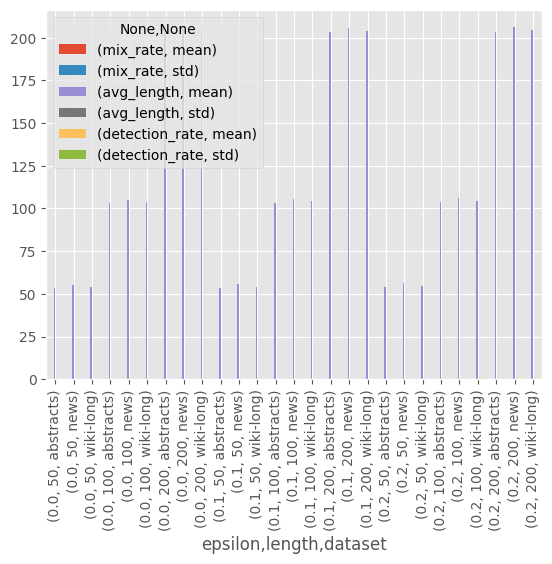

In [5]:
df_disp1 = df.groupby(['epsilon', 'length', 'dataset']).agg(['mean', 'std'])
df_disp = df_disp1.reset_index()
df_disp1.plot.bar()
df_disp = df_disp[df_disp.epsilon > 0].sort_values(['epsilon', 'length', 'dataset'])

In [7]:
from tabulate import tabulate
dfr = df[df.epsilon > 0].groupby(['epsilon', 'length', 'dataset']).detection_rate.agg(['mean', 'std']).reset_index()
dfr['accuracy'] = (dfr['mean'] + 0.95) / 2
#pd.DataFrame(df.groupby(['epsilon', 'length', 'dataset']).detection_rate.mean()).reset_index()
latex_table = tabulate(dfr.set_index('epsilon').round(3), tablefmt="latex", headers="keys")
print(latex_table)

dft = pd.DataFrame(dfr.accuracy).round(3).set_index('accuracy')
latex_table_acc = tabulate(dft, tablefmt="latex", headers="keys")
print(latex_table_acc)


\begin{tabular}{rrlrrr}
\hline
   epsilon &   length & dataset   &   mean &   std &   accuracy \\
\hline
       0.1 &       50 & abstracts &  0.097 & 0.012 &      0.523 \\
       0.1 &       50 & news      &  0.121 & 0.007 &      0.535 \\
       0.1 &       50 & wiki-long &  0.154 & 0.01  &      0.552 \\
       0.1 &      100 & abstracts &  0.157 & 0.016 &      0.554 \\
       0.1 &      100 & news      &  0.181 & 0.012 &      0.566 \\
       0.1 &      100 & wiki-long &  0.26  & 0.018 &      0.605 \\
       0.1 &      200 & abstracts &  0.242 & 0.041 &      0.596 \\
       0.1 &      200 & news      &  0.278 & 0.014 &      0.614 \\
       0.1 &      200 & wiki-long &  0.406 & 0.04  &      0.678 \\
       0.2 &       50 & abstracts &  0.166 & 0.013 &      0.558 \\
       0.2 &       50 & news      &  0.197 & 0.008 &      0.573 \\
       0.2 &       50 & wiki-long &  0.293 & 0.016 &      0.622 \\
       0.2 &      100 & abstracts &  0.279 & 0.024 &      0.614 \\
       0.2 &      100 & 

In [329]:
g = sns.catplot(df[df.epsilon > 0].sort_values('dataset'), kind='bar', col="epsilon", x='length', y='detection_rate', hue='dataset', width=0.5, 
height=4, aspect=.6, errorbar=("pi", 95), errcolor=".5"
)
#errorbar=("pi", 50), capsize=.4, errcolor=".5",linewidth=3, edgecolor=".5", facecolor=(0, 0, 0, 0)


g.set_axis_labels("Length [token]", "Detection Rate")
#g.set_xticklabels(["Men", "Women", "Children"])
#g.set_titles("{col_name} {col_var}")
g.set(ylim=(0, 1))
g.despine(left=True)


plt.show()

ValueError: Could not interpret input 'length'

In [330]:
import seaborn as sns

rgb_values1 = sns.color_palette("Set2", 8)
rgb_values2 = sns.color_palette("Set1", 3)

length_labels = df_disp['length'].unique()
dataset_labels = df_disp['dataset'].unique()
color_map_length = dict(zip(length_labels, rgb_values1))
color_map_dataset = dict(zip(dataset_labels, rgb_values2))

dataset
abstracts    Axes(0.125,0.11;0.775x0.77)
news         Axes(0.125,0.11;0.775x0.77)
wiki-long    Axes(0.125,0.11;0.775x0.77)
dtype: object

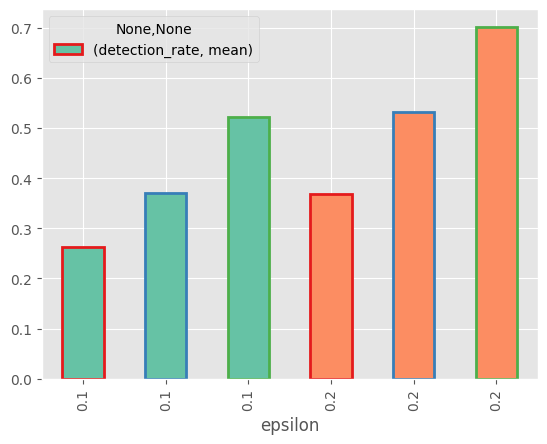

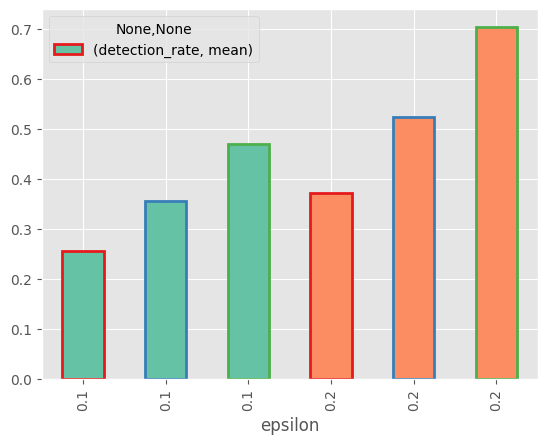

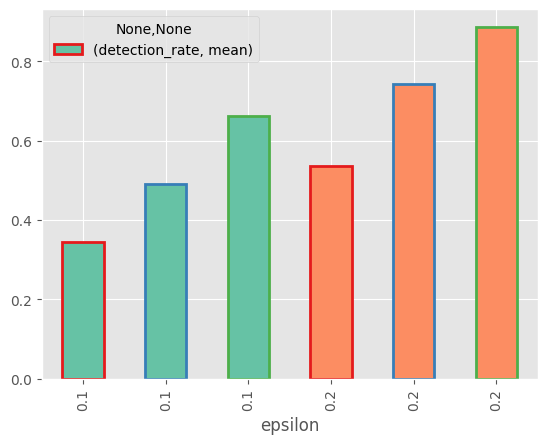

In [183]:
yerr = 2 * df_disp[('detection_rate', 'std')].values
df_disp.groupby('dataset').plot.bar(x='epsilon', y=('detection_rate', 'mean'), color=df_disp['length'].map(color_map_length),
                 #yerr = yerr,
                 linewidth = 2,
                 edgecolor=df_disp['dataset'].map(color_map_dataset))

<Axes: xlabel='length', ylabel="('detection_rate', 'mean')">

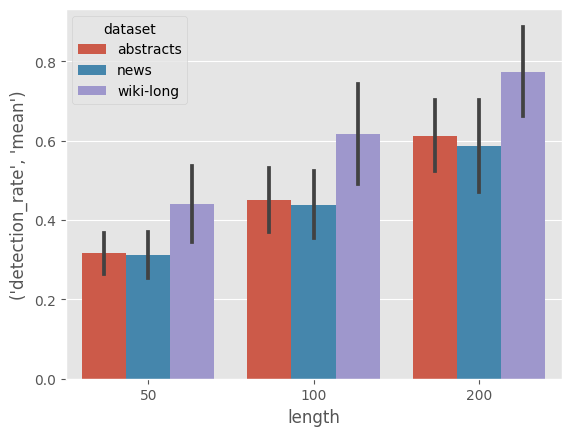

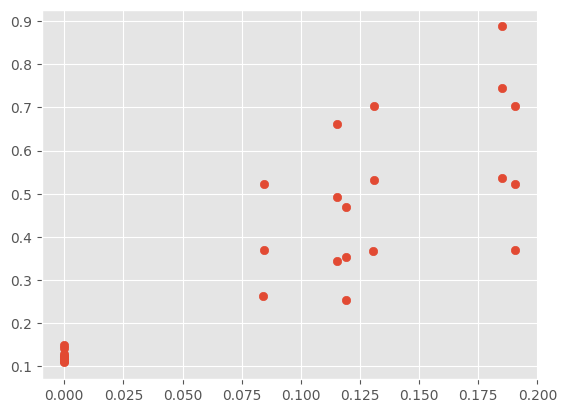

In [124]:
c = df_disp
plt.scatter(df_disp[('mix_rate','mean')].values, df_disp[('detection_rate','mean')].values)

# Results using pre-computed logperplexities

In [10]:
model_name = "gpt2-xl"
params = {}
params['ignore-first-sentence'] = True
params['language-model-name'] = model_name
params['number-of-interpolation-points'] = 47
params['max-tokens-per-sentence'] = 50
params['min-tokens-per-sentence'] = 10
params['hc-type'] = "stbl"
params['sig-level'] = 0.05

HC_survival_func = get_HC_survival_function("HC_null_sim_results.csv")

def get_survival_function(df, G=101):
    """
    One survival function for every sentence length in tokens

    Args:
    :df:  data frame with columns 'response' and 'length'

    Return:
        bivariate function (length, responce) -> (0,1)

    """
    assert not df.empty
    value_name = "response" if "response" in df.columns else "logloss"

    df1 = df[~df[value_name].isna()]
    ll = df1['length']
    xx1 = df1[value_name]
    return fit_per_length_survival_function(ll, xx1, log_space=True, G=G)

       
def group_articles_to_minimum_length(df, min_length):
    """
    Rearrange group names so that every group has at least
    :min_length: elements
    """
    df_grouped = df.copy()
    df_grouped.loc[:, 'new_name'] = df['name'].copy()
    groups = list(df.groupby('name'))
    while len(groups) > 0:
        c = groups.pop(0)
        acc = len(c[1])
        while (acc <= min_length) and len(groups)>0:
            c1 = groups.pop(0)
            acc += len(c1[1])
            df_grouped.loc[df['name'] == c1[0], 'new_name'] = c[0]

    return df_grouped

In [65]:
ds_machine = pd.read_csv(f"results/{model_name}_no_context_{dataset_name}_machine.csv")
print(len(ds_machine))
ds_null = ds_machine.sample(frac=0.5)
ds_machine = ds_machine.drop(index=ds_null.index)
print(len(ds_machine))

81873
40937


In [97]:
from tabulate import tabulate

\begin{tabular}{rllrrrr}
\hline
    & model   & dataset   &   epsilon &   mix\_rate &   length &   detection\_rate \\
\hline
  0 & gpt2-xl & abstracts &       0   &  0         &       50 &         0.108808 \\
  1 & gpt2-xl & abstracts &       0   &  0         &      100 &         0.136364 \\
  2 & gpt2-xl & abstracts &       0   &  0         &      200 &         0.173267 \\
  3 & gpt2-xl & abstracts &       0.1 &  0.0530042 &       50 &         0.251196 \\
  4 & gpt2-xl & abstracts &       0.1 &  0.0530042 &      100 &         0.365741 \\
  5 & gpt2-xl & abstracts &       0.1 &  0.0530042 &      200 &         0.486364 \\
  6 & gpt2-xl & abstracts &       0.2 &  0.0770463 &       50 &         0.371298 \\
  7 & gpt2-xl & abstracts &       0.2 &  0.0770463 &      100 &         0.525275 \\
  8 & gpt2-xl & abstracts &       0.2 &  0.0770463 &      200 &         0.668103 \\
\hline
\end{tabular}


In [107]:
#dataset_name = 'wiki-long'
#min_length = 200
#eps = 0.1

nMonte = 10

report = []
for _ in range(nMonte):
    for dataset_name in ['abstracts', 'wiki-long', 'news']:
        ds_machine = pd.read_csv(f"results/{model_name}_no_context_{dataset_name}_machine.csv")
        ds_null = ds_machine.sample(frac=0.5)
        ds_machine = ds_machine.drop(index=ds_null.index)

        pval_functions = get_survival_function(ds_null[ds_null.num > 1], G=params['number-of-interpolation-points'])

        ds_human = pd.read_csv(f"results/{model_name}_no_context_{dataset_name}_human.csv")
        ds_human['human'] = True
        ds_machine['human'] = False
        joint_names = ds_machine.merge(ds_human, on='name', how='inner')['name'].unique().tolist()
        print(f"Total number of shared articles {len(joint_names)}")

        ds_machine = ds_machine[ds_machine['name'].isin(joint_names)]        
        ds_human = ds_human[ds_human['name'].isin(joint_names)]
        
        lengths_machine = ds_machine.groupby('name')['num'].count().reset_index().rename(columns={'num':'machine_doc_length'})
        lengths_human = ds_human.groupby('name')['num'].count().reset_index().rename(columns={'num':'human_doc_length'})

        ds_pool =  ds_human.merge(lengths_machine, on='name', how='inner').merge(lengths_human, on='name', how='inner')
        min_length = 5
        ds_pool = ds_pool[(ds_pool['human_doc_length'] >= min_length) &  (ds_pool['machine_doc_length'] >= min_length)]
        print(f"Size of sentences to sample from is {len(ds_pool)}")

        for eps in [0, 0.1, 0.2]:
            for min_length in [50, 100, 200]:
                null_data_file = f"results/{model_name}_no_context_{dataset_name}_machine.csv"
                

                #ds_sample = ds_human.groupby("name").sample(frac=eps)
                ds_sample = pd.DataFrame()
                for c in ds_pool.groupby('name'):
                    k = int(np.ceil(c[1]['machine_doc_length'].values[0] * eps))
                    ds_sample = pd.concat([ds_sample, c[1].sample(n=k)])

                ds_mixed = pd.concat([ds_machine, ds_sample])
                ds_mixed_grouped = group_articles_to_minimum_length(ds_mixed, min_length)


                detectlm = DetectLM(lambda x: 0,
                                    pval_functions,
                                    min_len=params['min-tokens-per-sentence'],
                                    max_len=params['max-tokens-per-sentence'],
                                    HC_type=params['hc-type'],
                                    ignore_first_sentence=params['ignore-first-sentence']
                                    )
                stbl = True if params['hc-type']=='stbl' else False

                min_no_sentences = 10

                
                results = []
                for c in tqdm(ds_mixed_grouped.groupby('new_name')):
                    responses = c[1]['response']
                    lengths = c[1]['length']
                    mix_rate = np.mean(c[1]['human'])
                    if len(responses) > min_no_sentences:
                        pvals, _ = detectlm._get_pvals(responses, lengths)
                        pvals = np.vstack(pvals).squeeze()
                        mt = MultiTest(pvals, stbl=stbl)
                        hc = mt.hc()[0]
                        results.append(dict(id=c[0], HC=hc, len=len(responses), mix_rate=mix_rate))

                #t0 = crit_vals[(crit_vals.n == min_length) & (crit_vals.alpha == params['sig-level'])].q_alpha.values[0]
                HC_pvals = np.vstack([HC_survival_func(c['len'], c['HC']) for c in results])[:,0]
                acc = np.mean(HC_pvals <= params['sig-level'])
                
                avg_mix_rate = np.mean([c['mix_rate'] for c in results])
                print("Avg. Mixing rate = ", avg_mix_rate)
                report.append(dict(model=model_name, dataset=dataset_name, epsilon=eps, mix_rate=avg_mix_rate,
                            length=min_length, detection_rate=acc))
                print(f"Model={model_name}, dataset={dataset_name}, epsilon={eps}, length={min_length} --> detection rate {acc}")

                pd.DataFrame(report).to_csv("synthetic_data_report.csv")

Total number of shared articles 9810
Size of sentences to sample from is 39132


100%|██████████| 770/770 [00:00<00:00, 3696.29it/s]


Avg. Mixing rate =  0.0
Model=gpt2-xl, dataset=abstracts, epsilon=0, length=50 --> detection rate 0.08961038961038961


100%|██████████| 397/397 [00:00<00:00, 2246.92it/s]


Avg. Mixing rate =  0.0
Model=gpt2-xl, dataset=abstracts, epsilon=0, length=100 --> detection rate 0.11083123425692695


100%|██████████| 202/202 [00:00<00:00, 1274.50it/s]


Avg. Mixing rate =  0.0
Model=gpt2-xl, dataset=abstracts, epsilon=0, length=200 --> detection rate 0.13366336633663367


100%|██████████| 837/837 [00:00<00:00, 3671.02it/s]


Avg. Mixing rate =  0.08435461549224105
Model=gpt2-xl, dataset=abstracts, epsilon=0.1, length=50 --> detection rate 0.2236842105263158


100%|██████████| 432/432 [00:00<00:00, 2233.97it/s]


Avg. Mixing rate =  0.08458208597442922
Model=gpt2-xl, dataset=abstracts, epsilon=0.1, length=100 --> detection rate 0.30092592592592593


100%|██████████| 220/220 [00:00<00:00, 1281.73it/s]


Avg. Mixing rate =  0.0847822976381984
Model=gpt2-xl, dataset=abstracts, epsilon=0.1, length=200 --> detection rate 0.44545454545454544


100%|██████████| 879/879 [00:00<00:00, 3690.14it/s]


Avg. Mixing rate =  0.1312155356336864
Model=gpt2-xl, dataset=abstracts, epsilon=0.2, length=50 --> detection rate 0.3321956769055745


100%|██████████| 456/456 [00:00<00:00, 2276.66it/s]


Avg. Mixing rate =  0.13172826670380647
Model=gpt2-xl, dataset=abstracts, epsilon=0.2, length=100 --> detection rate 0.4868421052631579


100%|██████████| 232/232 [00:00<00:00, 1284.56it/s]


Avg. Mixing rate =  0.13187543146305433
Model=gpt2-xl, dataset=abstracts, epsilon=0.2, length=200 --> detection rate 0.6336206896551724
Total number of shared articles 9818
Size of sentences to sample from is 70070


KeyboardInterrupt: 

In [41]:
latex_table = tabulate(pd.DataFrame(report), tablefmt="latex", headers="keys")
print(latex_table)

740189

In [47]:
len(ds_pool)

78528

# Analyze results of actual tests on mixed batches

In [6]:
dataset = 'wiki'
N = 100
eps = "02"
results_filename0 = f"results/results_mixed_{dataset}_large_eps00_atleast{N}.json"

with open(results_filename0, "r") as f:
    data0 = json.load(f)

results_filename = f"results/results_mixed_{dataset}_large_eps{eps}_atleast{N}.json"

with open(results_filename, "r") as f:
    data = json.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'results/results_mixed_wiki_large_eps00_atleast100.json'

In [52]:
df0 = pd.DataFrame(data0).T
df = pd.DataFrame(data).T

In [53]:
hc95 = df0['hc'].quantile(0.95)
hc975 = df0['hc'].quantile(0.975)
fisher005 = df0['fisher_pval'].quantile(0.05)
fisher0025 = df0['fisher_pval'].quantile(0.025)

print("HC95 = ", hc95)
print("HC975 = ", hc975)
print("fisher_pval005 = ", fisher005)
print("fisher_pval0025 = ", fisher0025)


HC95 =  1.8178062500292147
HC975 =  2.535116275417343
fisher_pval005 =  0.29723165156186626
fisher_pval0025 =  0.14774678633300464


In [56]:
print("HC discoveries: ", np.mean(df.hc > hc95))
print("Fisher discoveries: ", np.mean(df.fisher_pval < fisher005))
print("Combined: ", np.mean( (df.hc > hc975) | (df.fisher_pval < fisher0025) ))
print("TD rate: ", np.mean(df.TDP))
print("Recall: ", np.mean(df['recall']))


HC discoveries:  0.47005444646098005
Fisher discoveries:  0.676950998185118
Combined:  0.5662431941923775
TD rate:  0.6442338615751858
Recall:  0.31940018465146036


In [94]:
def report_results(eps, N, dataset, null_values = "file"):

    if null_values == "file":
        results_filename0 = f"results/results_mixed_{dataset}_large_eps00_atleast{N}.json"

        with open(results_filename0, "r") as f:
            data0 = json.load(f)

        df0 = pd.DataFrame(data0).T
        hc95 = df0['hc'].quantile(0.95)
        hc975 = df0['hc'].quantile(0.975)
        fisher005 = df0['fisher_pval'].quantile(0.05)
        fisher0025 = df0['fisher_pval'].quantile(0.025)
    else:
        hc95 = 1.9
        hc975 = 2.5
        fisher005 = 0.05
        fisher0025 = 0.025

    results_filename = f"results/results_mixed_{dataset}_large_eps{eps}_atleast{N}.json"
    with open(results_filename, "r") as f:
        data = json.load(f)
    df = pd.DataFrame(data).T

    print("HC95 = ", hc95)
    print("HC975 = ", hc975)
    print("fisher_pval005 = ", fisher005)
    print("fisher_pval0025 = ", fisher0025)

    print("HC discoveries: ", np.mean(df.hc > hc95))
    print("Fisher discoveries: ", np.mean(df.fisher_pval < fisher005))
    print("Combined: ", np.mean( (df.hc > hc975) | (df.fisher_pval < fisher0025) ))
    print("TD rate: ", np.mean(df.TDP))
    print("Recall: ", np.mean(df['recall']))
    precision = np.mean(df.TDP)
    recall  = np.mean(df['recall'])
    print("F1: ", 2 * (precision * recall) / (precision + recall) )


In [112]:
# to run: news_00_100
report_results("02", 100, 'news', null_values='file')

HC95 =  3.015005190653863
HC975 =  3.6875221728066476
fisher_pval005 =  0.056135834216864765
fisher_pval0025 =  0.019863872627446013
HC discoveries:  0.7096188747731398
Fisher discoveries:  0.6352087114337568
Combined:  0.6842105263157895
TD rate:  0.6982262791077891
Recall:  0.20576222395340626
F1:  0.31785490971494096
